In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
# import housing_price sheet
house_prices = pd.read_csv("../Ames_HousePrice.csv")

In [6]:
house_prices.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [17]:
house_prices[house_prices.columns.isnull().any()]

KeyError: False

In [32]:
house_prices[house_prices.columns[house_prices.isnull().any()]].isnull().sum()

LotFrontage      462
Alley           2412
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64

In [34]:
house_prices.shape

(2580, 82)

In [41]:
house_prices[house_prices['LotFrontage'].isnull()]['MSSubClass'].value_counts()

#         20	1-STORY 1946 & NEWER ALL STYLES
#         30	1-STORY 1945 & OLDER
#         40	1-STORY W/FINISHED ATTIC ALL AGES
#         45	1-1/2 STORY - UNFINISHED ALL AGES
#         50	1-1/2 STORY FINISHED ALL AGES
#         60	2-STORY 1946 & NEWER
#         70	2-STORY 1945 & OLDER
#         75	2-1/2 STORY ALL AGES
#         80	SPLIT OR MULTI-LEVEL
#         85	SPLIT FOYER
#         90	DUPLEX - ALL STYLES AND AGES
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150	1-1/2 STORY PUD - ALL AGES
#        160	2-STORY PUD - 1946 & NEWER
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES

20     171
60     128
120     33
80      30
50      24
90      17
85      15
160     13
30      12
70      10
190      4
75       2
40       1
180      1
150      1
Name: MSSubClass, dtype: int64

In [45]:
house_prices[house_prices['YearRemodAdd'] == house_prices['YearBuilt']]
# houses that have not been remodeled

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
5,6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
6,7,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
8,9,923426010,889,137500,20,RL,74.0,12395,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,752,534479150,1036,112900,20,RL,63.0,7584,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal
2570,754,905102170,1040,129500,20,RL,70.0,11200,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2571,755,532376170,890,115000,190,RL,65.0,8450,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
2576,760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [47]:
house_prices['YearRemodAdd'] - house_prices['YearBuilt']
# can create a column showing how many years between building and remodel

0        11
1         0
2        77
3       103
4         0
       ... 
2575     34
2576      0
2577      1
2578      0
2579      1
Length: 2580, dtype: int64

In [49]:
house_prices['YrSold'] - house_prices['YearRemodAdd']
# column showing years between last remodel and the year that it was sold (how new the construction is)

0       60
1       25
2        0
3        6
4        8
        ..
2575    59
2576    54
2577    57
2578     7
2579    12
Length: 2580, dtype: int64

In [7]:
house_prices['BsmtExposure'].value_counts()

No    1708
Av     344
Gd     242
Mn     215
Name: BsmtExposure, dtype: int64

In [11]:
imputation_dict = house_prices.groupby(['MSSubClass', 'Neighborhood'])[['LotFrontage']].mean().to_dict()
# groupby subclass, neighborhood, interpolate average lot frontage

In [27]:
missingRowIndexes = house_prices.LotFrontage.isnull()
# impute the value by using the above imputation_dict
house_prices.loc[missingRowIndexes,'LotFrontage'] = house_prices[missingRowIndexes].apply(\
    lambda row: imputation_dict['LotFrontage'][(row['MSSubClass'], row['Neighborhood'])], axis = 1)

In [33]:
house_prices[house_prices['LotFrontage'].isnull()]["Neighborhood"]

109     GrnHill
275     Veenker
369     Mitchel
471      NWAmes
653     ClearCr
683     GrnHill
1068    ClearCr
1204    Landmrk
1401     NWAmes
1482    BrkSide
1485    Veenker
1634     Timber
1641     NWAmes
1920     NWAmes
1943     NWAmes
1960    ClearCr
2116    BrkSide
2222     NWAmes
2294    ClearCr
2327    Veenker
2361    ClearCr
Name: Neighborhood, dtype: object

In [30]:
house_prices['Neighborhood'].value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [17]:
house_prices["MSSubClass"].value_counts()

20     939
60     502
50     259
120    169
30     123
160    120
70     116
80     109
90      87
190     53
85      43
75      21
45      17
180     15
40       6
150      1
Name: MSSubClass, dtype: int64

In [36]:
house_prices[house_prices['LotFrontage'].isnull()]['MSSubClass'].value_counts()

85     4
120    3
60     3
190    3
50     2
75     2
70     1
160    1
40     1
150    1
Name: MSSubClass, dtype: int64

FireplaceQu    48.100775
Fence          79.651163
Alley          93.488372
MiscFeature    96.240310
PoolQC         99.651163
dtype: float64


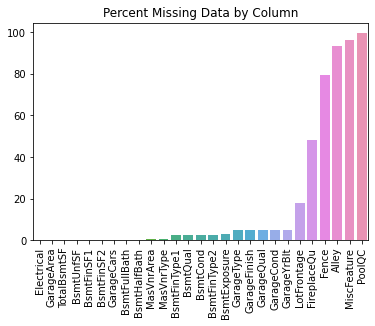

In [24]:
def percent_null(housing):
    percentmis = 100* housing.isnull().sum() / len(housing)
    return percentmis
percentmis=percent_null(house_prices)


percentmis = percentmis[percentmis>0].sort_values()
sns.barplot(x= percentmis.index, y=percentmis).set(title='Percent Missing Data by Column')
plt.xticks(rotation=90)
print(percentmis[percentmis>=20])

In [35]:
house_prices[(house_prices["MSSubClass"] == 85) & (house_prices["Neighborhood"] == "NWAmes")]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1401,402,527358090,1083,172000,85,RL,NaN,9927,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
1641,642,527328010,1102,169000,85,RL,NaN,10464,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1920,104,534127140,1082,162500,85,RL,NaN,8723,Pave,NaN,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal
1943,127,534251030,1320,172500,85,RL,NaN,16500,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [32]:
house_prices.dtypes

Unnamed: 0        int64
PID               int64
GrLivArea         int64
SalePrice         int64
MSSubClass        int64
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 82, dtype: object

In [40]:
house_prices = house_prices[house_prices['LotFrontage'].isnull() == False]
# remove null lot frontage where couldn't interpolate(21 rows)

In [43]:
house_prices['Remodeled'] = (house_prices['YearRemodAdd'] - house_prices['YearBuilt']) > 0
house_prices['Remodeled'] = house_prices['Remodeled'].astype(int)
house_prices.head()
# boolean if house has been remodeled or not

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodeled
0,1,909176150,856,126000,30,RL,57.8,7890,Pave,NaN,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,1
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,0
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,1
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,1
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,0


In [47]:
house_prices['BsmtfinSF']= house_prices.TotalBsmtSF - house_prices.BsmtUnfSF
house_prices['BsmtfinSF']

0       238.0
1       945.0
2       737.0
3         0.0
4       643.0
        ...  
2575      0.0
2576      0.0
2577    284.0
2578    841.0
2579    380.0
Name: BsmtfinSF, Length: 2559, dtype: float64

In [55]:
house_prices['Fireplaces'] = house_prices['Fireplaces'] > 0

In [56]:
house_prices['Fireplaces'] = house_prices['Fireplaces'].astype(int)

In [58]:
house_prices['Fireplaces'].value_counts()
# changed fireplaces to present/not

1    1324
0    1235
Name: Fireplaces, dtype: int64

In [59]:
house_prices.shape

(2559, 84)

In [65]:
# columns to drop
drop_list = ['MiscVal', 'PoolArea', 'LowQualFinSF', 'Heating', 'RoofMatl', 'GarageYrBlt', 'FireplaceQu', 'TotalBsmtSF', 'Utilities', 'PoolQC', 'Alley', 'MiscFeature', 'GarageFinish', 'GarageArea', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2']

In [66]:
# dropping columns
house_prices = house_prices.drop(drop_list, axis=1)
house_prices.columns

Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscVal', 'MoSold', 'YrSold', 

In [76]:
house_prices["Fence"] = (house_prices["Fence"].isnull() == False).astype(int)
# convert fence into boolean 1/0

In [79]:
house_prices.loc[house_prices["Fence"] == True]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodeled,BsmtfinSF
11,12,923426070,1274,136000,60,RL,63.0,10475,Pave,Reg,...,0,0,1,0,3,2010,WD,Normal,0,458.0
42,43,535425060,1312,186000,20,RL,76.0,11355,Pave,IR1,...,0,0,1,6500,4,2008,WD,Normal,1,637.0
48,49,902106130,936,109500,30,RM,56.0,4485,Pave,Reg,...,0,0,1,0,5,2010,WD,Normal,1,579.0
49,50,902102080,1230,110000,50,RM,60.0,10440,Pave,Reg,...,0,0,1,0,5,2009,WD,Normal,1,0.0
55,56,532479020,1641,140000,50,RL,70.0,10759,Pave,Reg,...,0,0,1,0,7,2008,WD,Normal,0,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,743,535179020,1580,159500,20,RL,80.0,10032,Pave,Reg,...,160,0,1,0,6,2010,WD,Normal,0,734.0
2564,748,535402220,1734,159000,50,RL,77.0,9786,Pave,IR1,...,128,0,1,0,6,2006,WD,Normal,1,600.0
2567,751,910200110,1215,141000,50,RM,50.0,7000,Pave,Reg,...,0,0,1,0,5,2007,WD,Normal,1,375.0
2568,752,534479150,1036,112900,20,RL,63.0,7584,Pave,Reg,...,0,0,1,0,6,2008,WD,Normal,0,531.0


In [80]:
categorical = list(house_prices.columns)
for feature in categorical:
    print(house_prices[feature].value_counts())
    print('')

1      3
514    3
504    3
2      3
506    3
      ..
881    1
882    1
883    1
884    1
896    1
Name: Unnamed: 0, Length: 1000, dtype: int64

909276070    2
909176150    1
902206040    1
535457070    1
909250220    1
            ..
532479120    1
531452260    1
528488130    1
923229010    1
906223180    1
Name: PID, Length: 2558, dtype: int64

864     38
1040    25
1092    24
1456    15
1200    14
        ..
778      1
2501     1
1477     1
1837     1
1911     1
Name: GrLivArea, Length: 1202, dtype: int64

135000    32
140000    28
155000    27
130000    27
145000    23
          ..
254750     1
40000      1
67000      1
418000     1
139600     1
Name: SalePrice, Length: 866, dtype: int64

20     939
60     499
50     257
120    166
30     123
160    119
70     115
80     109
90      87
190     50
85      39
75      19
45      17
180     15
40       5
Name: MSSubClass, dtype: int64

RL         1990
RM          416
FV          113
RH           20
C (all)      17
I (all)       2
A (ag